## Reconstruction of a Discrete Real Signal from only the Real Part of its Fourier Transform

**... with interesting applications in signal compression**

*See: IEEE Signal Processing Magazine, March 2018, "Tips & Tricks" column.*

In [1]:
from numpy import *
from numpy.fft import rfft,irfft
from numpy.random import normal

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### Prepare the Signal Before Computing the FFT

Extend the signal by copying it to a buffer filled with zeros.  
The buffer should be twice the signal length and the signal should be copied to the buffer starting at the second element.

<pre> 
extsignal = zeros(2 * len(signal))
extsignal[1:len(signal)+1] = signal  # shift the signal pad it
len(extsignal) == 2 * len(signal)
</pre>

### Real DFT

The extended signal can viewed as a shifted version of the original signal with two segments.  
The first segment contains the original signal with a leading zero, and the second segment is all zeros except for the first element which contains the last sample of the original signal.  
This implies that a speed-up can obtained with an optimized FFT algorithm for this case since the extended signal is always a power of two.

In [3]:
def rdft(signal):
    """
    Return the real part of the spectrum of the signal.
    """
    extSignal = zeros(2 * len(signal))
    extSignal[1:len(signal)+1] = signal  # shift and pad
    return array([real(e) for e in rfft(extSignal)])

### Inverse Real DFT

Multiply the spectrum by 2 and slice out the shifted signal.
The last reconstructed signal sample must be divided by 2.

In [4]:
def irdft(spectrum):
    """
    Inverse rdft.
    """
    signal = irfft(2.0 * spectrum)[1:len(spectrum)]
    signal[-1] /= 2.0 # this is different from the article!
    return signal

### Example: a Random Signal

In [5]:
signal = normal(size=100).cumsum()
print(f"{len(signal)} samples")
signal

100 samples


array([-0.41204577, -1.66472951, -2.77175069, -2.56121046, -2.79991109,
       -3.66941367, -3.26526073, -3.24714109, -3.28394555, -4.17734818,
       -2.58553737, -3.26993397, -2.09970581, -2.14944613, -3.76906439,
       -3.33197669, -3.17606339, -0.87385834, -0.10660042,  1.61919419,
        1.4594729 ,  0.61089936,  0.84141119,  1.16215532,  2.11398725,
        3.23681056,  2.89245904,  2.57296685,  2.51089114,  2.28782185,
        2.19930798,  0.84773414,  1.31069061,  1.37464338,  0.5977373 ,
       -0.54101823, -0.7163202 , -0.28007328, -0.13477682,  2.33688567,
        2.60765361,  2.67262877,  2.68319915,  3.42944578,  3.22459016,
        1.41580474, -0.23406932, -1.01194966, -0.09732815, -0.24809104,
       -1.56767402, -1.37664997, -2.17298448, -1.35777474, -1.83478302,
       -2.37193346, -1.91597608, -2.02006357, -0.86307792, -1.00141185,
       -1.6094357 , -1.02607829, -0.44118852, -1.46757798, -0.92831432,
        0.12738589, -1.72416072, -3.19084136, -2.89876418, -2.13

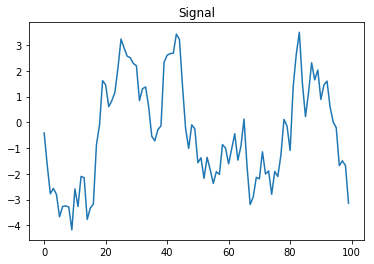

In [6]:
_ = plt.plot(range(len(signal)), signal)
_ = plt.title("Signal")

### Extract the Real Part of the Discrete Fourier Transform of the  Extended Signal

In [7]:
rdftSpectrum = rdft(signal)
print(f"{len(rdftSpectrum)} coefficients")
rdftSpectrum

101 coefficients


array([-4.18653942e+01, -1.44826972e+01, -2.71293418e+01, -9.07553236e+01,
       -2.54093622e+01,  2.71972934e+01, -1.07101354e+01,  4.31454694e+01,
       -3.39903962e+00,  5.86452342e+01,  5.16115701e+00, -2.00958219e+01,
       -1.35226030e+01,  1.68855544e+01,  1.09690051e+01,  9.22235596e+00,
       -1.27623225e+01,  6.02600646e+00,  2.21616878e+00,  2.68950275e+01,
        1.88255890e+00, -1.99432626e+00,  5.77662684e+00,  1.23637139e+00,
        1.73410961e+00, -6.07624820e+00, -1.38200799e+01,  1.08225623e+00,
        5.66286591e+00,  8.63768935e+00,  7.20585836e+00,  1.82733006e+01,
       -4.41086615e+00,  4.88845092e+00, -4.34760742e-01, -8.53594685e+00,
        7.95255329e+00, -7.99384573e+00, -5.61940856e+00,  3.08540905e+00,
        5.73813090e+00,  1.03405737e+01, -1.16475825e+01,  5.56553818e+00,
       -4.03548456e+00,  1.21991206e+01, -1.34246822e+00, -2.18788617e+00,
        9.33216594e+00, -2.94849948e-02, -2.38939433e+00,  3.92980639e-01,
       -1.43818270e+00,  

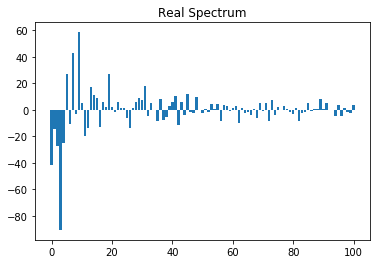

In [8]:
plt.bar(range(len(rdftSpectrum)), rdftSpectrum)
_ = plt.title("Real Spectrum")

### Reconstruct the Original Signal

In [22]:
reconsignal = irdft(rdftSpectrum)
print(f"{len(reconsignal)} samples")
reconsignal

100 samples


array([-0.41204577, -1.66472951, -2.77175069, -2.56121046, -2.79991109,
       -3.66941367, -3.26526073, -3.24714109, -3.28394555, -4.17734818,
       -2.58553737, -3.26993397, -2.09970581, -2.14944613, -3.76906439,
       -3.33197669, -3.17606339, -0.87385834, -0.10660042,  1.61919419,
        1.4594729 ,  0.61089936,  0.84141119,  1.16215532,  2.11398725,
        3.23681056,  2.89245904,  2.57296685,  2.51089114,  2.28782185,
        2.19930798,  0.84773414,  1.31069061,  1.37464338,  0.5977373 ,
       -0.54101823, -0.7163202 , -0.28007328, -0.13477682,  2.33688567,
        2.60765361,  2.67262877,  2.68319915,  3.42944578,  3.22459016,
        1.41580474, -0.23406932, -1.01194966, -0.09732815, -0.24809104,
       -1.56767402, -1.37664997, -2.17298448, -1.35777474, -1.83478302,
       -2.37193346, -1.91597608, -2.02006357, -0.86307792, -1.00141185,
       -1.6094357 , -1.02607829, -0.44118852, -1.46757798, -0.92831432,
        0.12738589, -1.72416072, -3.19084136, -2.89876418, -2.13

MSE of reconstruction = 0.0000000


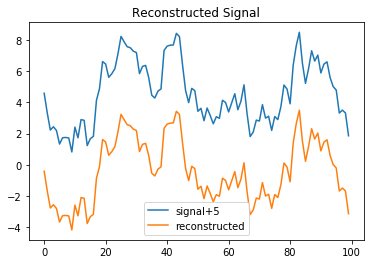

In [10]:
print(f"MSE of reconstruction = {pow(signal - reconsignal, 2.0).mean():.7f}")

_ = plt.plot(range(len(signal)), signal+5, label="signal+5")
_ = plt.plot(range(len(reconsignal)), reconsignal, label="reconstructed")
_ = plt.title("Reconstructed Signal")
_ = plt.legend()

## Signal Compression by Zeroing the Small Real Fourier Transform Coefficients

The signal spectrum is sparsified by hard thresholding.

In [11]:
def sparsify(spectrum, minAmplitude=1.0):
    """
    Zero the coefficients with absolute value less than 'minAmplitude'.
    """
    largeCoeffs = abs(spectrum) > abs(minAmplitude)
    return spectrum * largeCoeffs

In [12]:
def unsparsify(sparseSpectrum, maxAmplitude=1.0):
    """
    Fill the holes (the zeros) in the 'sparseSpectrum' with
    normal random values between '-maxAmplitude' and 'maxAmplitude'.
    """
    zeroIndexes = sparseSpectrum == 0.0
    filler = normal(size=sum(zeroIndexes))
    filler *= maxAmplitude/sum(abs(filler))
    filledSpectrum = sparseSpectrum.copy()
    filledSpectrum[zeroIndexes] = filler
    return filledSpectrum

In [13]:
sparseRDFT = sparsify(rdftSpectrum, minAmplitude=10.0)
sparseRDFT

array([-41.86539418, -14.48269723, -27.12934183, -90.75532356,
       -25.40936217,  27.19729344, -10.7101354 ,  43.14546944,
        -0.        ,  58.64523425,   0.        , -20.09582192,
       -13.52260297,  16.88555437,  10.96900513,   0.        ,
       -12.76232253,   0.        ,   0.        ,  26.89502752,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.        , -13.82007993,   0.        ,
         0.        ,   0.        ,   0.        ,  18.27330058,
        -0.        ,   0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,  10.3405737 , -11.64758252,   0.        ,
        -0.        ,  12.19912062,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,   0.        , -10.31666298,   0.  

In [14]:
zeroCount = sum(sparseRDFT == 0.0)
zeroRatio = zeroCount/len(rdftSpectrum)
print(f"{zeroCount} ({zeroRatio * 100.0:5.2f}%) Real Discrete Fourier Transform coefficients are zero")

80 (79.21%) Real Discrete Fourier Transform coefficients are zero


In [15]:
sparsifiedSignal = irdft(sparseRDFT)

In [19]:
unsparsifiedSignal = irdft(unsparsify(sparseRDFT, maxAmplitude=5.0))

### A random unsparsified reconstruction is sometimes better than the sparsified reconstruction

Investigation required: Could a search procedure be developed or could a reconstruction algorithm be learned to optimally fill-in the zeros of a sparsified real spectrum?

In [20]:
print(f"MSE of full reconstruction = {pow(signal - irdft(rdftSpectrum), 2.0).mean():.7f}")
print(f"MSE of sparsified reconstruction = {pow(signal - sparsifiedSignal, 2.0).mean():.7f}")
print(f"MSE of unsparsified reconstruction = {pow(signal - unsparsifiedSignal, 2.0).mean():.7f}")

MSE of full reconstruction = 0.0000000
MSE of sparsified reconstruction = 0.3038256
MSE of unsparsified reconstruction = 0.3020276


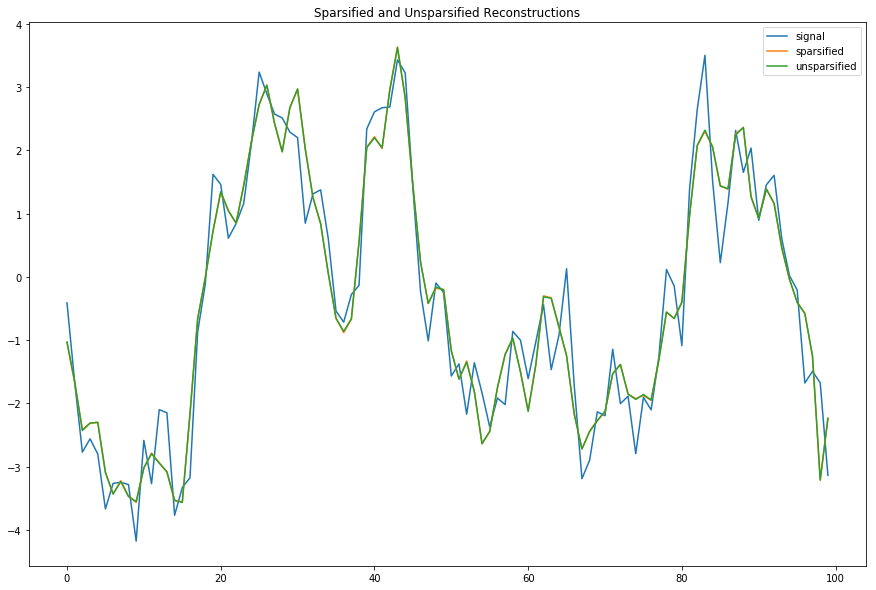

In [21]:
plt.figure(figsize=(15,10))
_ = plt.plot(range(len(signal)), signal, label="signal")
_ = plt.plot(range(len(sparsifiedSignal)), sparsifiedSignal, label="sparsified")
_ = plt.plot(range(len(unsparsifiedSignal)), unsparsifiedSignal, label="unsparsified")
_ = plt.title("Sparsified and Unsparsified Reconstructions")
_ = plt.legend()